# Cluster Analysis

### Contents:
1. Import libraries
2. Import data
3. Data preprocessing
  - Standardize data
4. The elbow technique
5. k-means clustering
  - Scatterplots
  - Conclusion
6. Descriptive statistics
  - Conclusion
7. Export data

## 1. Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This command prompts matplotlib visuals to appear in the notebook without the need to "call" them specifically.
%matplotlib inline

## 2. Import data

In [3]:
# Create a string of the path for the main project folder
path = r'C:\Users\Ryan\Documents\08-31-2023 Citi Bike Analysis'

In [4]:
# Import the “201903-citibike-tripdata-cleaned.pkl” data set using the os library
df_citibike = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', '201903-citibike-tripdata-cleaned.pkl'))

In [5]:
# Check the output
df_citibike.head()

,user_type,gender,age,age_group,trip_duration,start_day_name,start_day,start_hour,start_station,start_latitude,start_longitude,end_station,end_latitude,end_longitude,borough
0,Subscriber,Male,30,26-35,24.379999,Friday,1,0,Fulton St & Broadway,40.711067,-74.009445,Greenwich St & W Houston St,40.728848,-74.008591,Manhattan
1,Subscriber,Male,39,36-45,4.750000,Friday,1,0,E 4 St & 2 Ave,40.726280,-73.989777,E 2 St & Avenue C,40.720875,-73.980858,Manhattan
2,Subscriber,Male,32,26-35,11.430000,Friday,1,0,E 33 St & 5 Ave,40.747658,-73.984909,6 Ave & Spring St,40.725254,-74.004120,Manhattan
3,Subscriber,Female,32,26-35,7.370000,Friday,1,0,6 Ave & Spring St,40.725254,-74.004120,Bayard St & Baxter St,40.716022,-73.999741,Manhattan
4,Subscriber,Male,28,26-35,48.549999,Friday,1,0,W 31 St & 7 Ave,40.749157,-73.991600,W 16 St & The High Line,40.743351,-74.006821,Manhattan


## 3. Data preprocessing

In [6]:
# Create a subset
df = df_citibike[['age', 'trip_duration', 'start_hour']]

In [7]:
# Check the output
df.head()

,age,trip_duration,start_hour
0,30,24.379999,0
1,39,4.750000,0
2,32,11.430000,0
3,32,7.370000,0
4,28,48.549999,0


#### Standardize data

In [8]:
# Define standard scaler
scaler = StandardScaler()

In [9]:
# Transform data
df_transform = scaler.fit_transform(df)

In [10]:
# Check the output
df_transform

array([[-0.7486796 ,  0.08615369, -2.9207828 ],
       [-0.00399809, -0.07068273, -2.9207828 ],
       [-0.5831948 , -0.01731201, -2.9207828 ],
       ...,
       [-0.6659372 , -0.04008245,  1.9162576 ],
       [-0.5831948 , -0.02074755,  1.9162576 ],
       [ 0.57519865, -0.09105629,  1.9162576 ]], dtype=float32)

In [11]:
# Convert data to pandas dataframe
df_transform = pd.DataFrame(df_transform)

In [12]:
# Check the output
df_transform.head()

,0,1,2
0,-0.748680,0.086154,-2.920783
1,-0.003998,-0.070683,-2.920783
2,-0.583195,-0.017312,-2.920783
3,-0.583195,-0.049750,-2.920783
4,-0.914164,0.279263,-2.920783


## 4. The elbow technique

In [13]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

In [14]:
# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_transform).score(df_transform) for i in range(len(kmeans))]

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [16]:
# Check score output
score

[-3767049.75,
 -2845892.0,
 -2045983.125,
 -1367615.5,
 -1139561.75,
 -938858.5,
 -830185.6875,
 -720641.75,
 -661918.75]

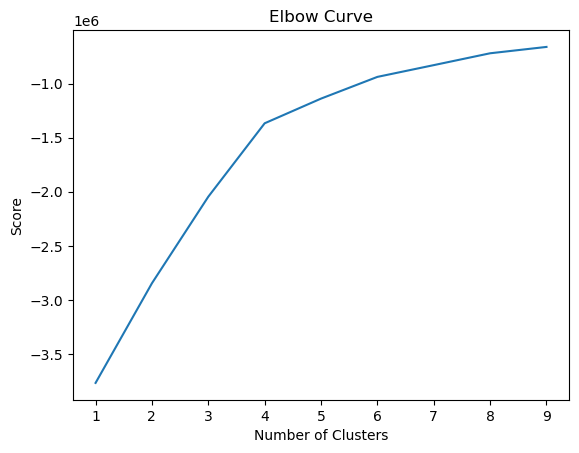

In [17]:
# Plot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from 1 to 4 on the on the x-axis, but after that, the curve gets less steeper. This means that the optimal count for the clusters is 4.

## 5. k-means clustering

In [18]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [19]:
# Fit the k-means object to the data
kmeans.fit(df_transform)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [20]:
# Add 'clusters' column to subset dataframe
df['clusters'] = kmeans.fit_predict(df_transform)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\AppData\Local\Temp\ipykernel_11032\2432634431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df_transform)


In [21]:
# Check the output
df.head()

,age,trip_duration,start_hour,clusters
0,30,24.379999,0,0
1,39,4.750000,0,0
2,32,11.430000,0,0
3,32,7.370000,0,0
4,28,48.549999,0,0


In [22]:
# Obtain frequencies of 'clusters' column
df['clusters'].value_counts()

1    517629
0    393653
3    344143
2        67
Name: clusters, dtype: int64

#### Scatterplots

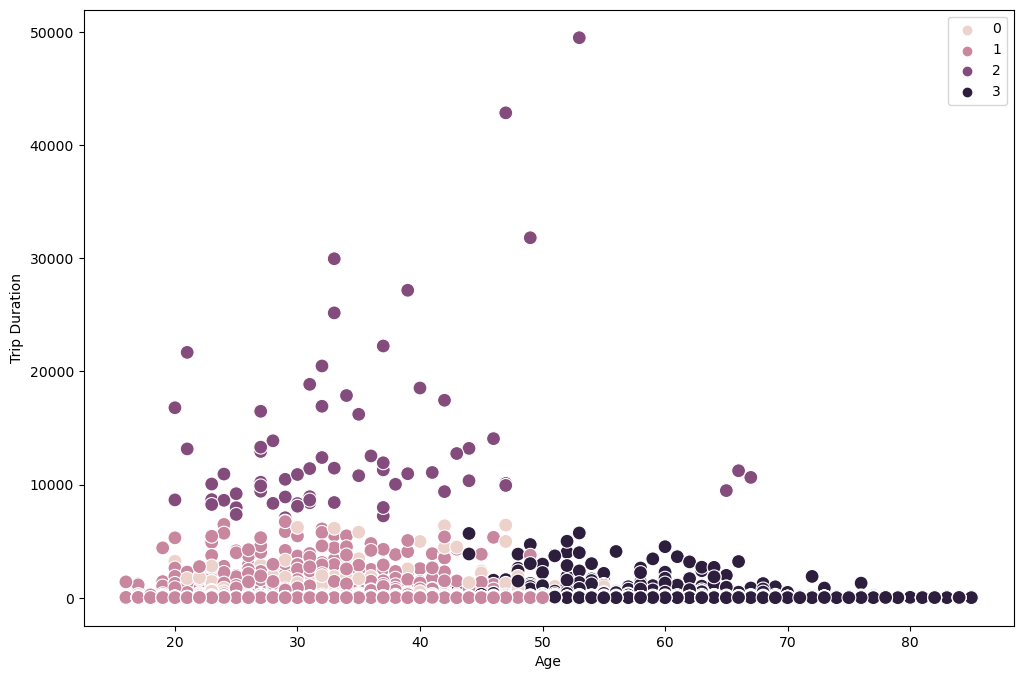

In [23]:
# Plot the clusters for the 'age' and 'trip duration' variables
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df['age'], y=df['trip_duration'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Age') 
plt.ylabel('Trip Duration') 
plt.show()

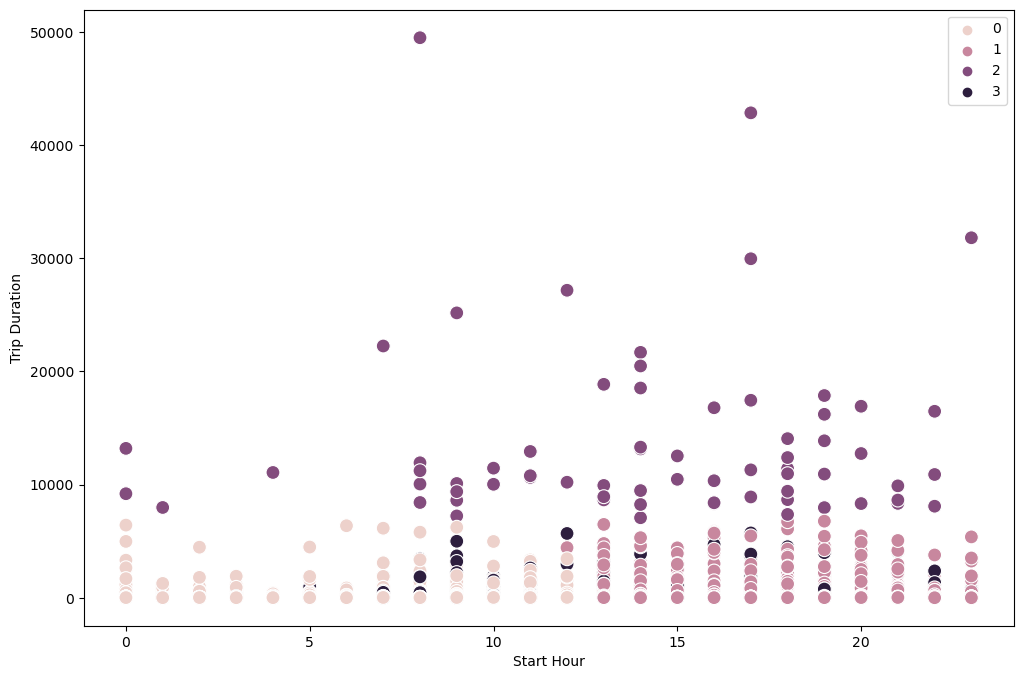

In [24]:
# Plot the clusters for the 'start hour' and 'trip duration' variables
plt.figure(figsize=(12,8))
ax=sns.scatterplot(x=df['start_hour'], y=df['trip_duration'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Start Hour') 
plt.ylabel('Trip Duration') 
plt.show()

#### Conclusion
- The light pink cluster (coded as "0" in the legend) are younger Citi Bike users who start trips earler in the day.
- The pink cluster (coded as "1" in the legend) are younger Citi Bike users who start trips later in the day.
- The purple cluster (coded as "2" in the legend) are the Citi Bike users who have ridiculously long trip durations.
- The dark purple cluster (coded as "3" in the legend) are older Citi Bike users.

These clusters represent the four distinct groups of Citi Bike users. The light pink and pink clusters are likely users who commute to and from work. The purple cluster is likely subscribers keeping the bike to themselves or customers on vacation needing transportation while at New York. The dark purple cluster is likely users who are retired and just casually enjoying a bike ride in New York.

## 6. Descriptive statistics

In [25]:
# Obtain the mean and median values of each cluster
df.groupby('clusters').agg({'age':['mean', 'median'],
                            'trip_duration':['mean', 'median'],
                            'start_hour':['mean', 'median']})

age        trip_duration               start_hour       
               mean median          mean        median       mean median
clusters                                                                
0         34.493722   34.0     11.931086      8.300000   8.808565    9.0
1         31.880206   31.0     13.844330      9.050000  17.551161   17.0
2         34.417910   32.0  13693.212891  10930.919922  14.179104   14.0
3         55.040698   54.0     12.466641      8.800000  14.189227   15.0

#### Conclusion
The statistics agree with my analysis from the scatterplots.
- Cluster 0 (colored as light pink) are younger Citi Bike users who are likely commuting to work (mean start hour is close to 9am).
- Cluster 1 (colored as pink) are younger Citi Bike users who are likely going home from work (mean start hour is close to 6pm).
- Cluster 2 (colored as purple) are the Citi Bike users who have ridiculously long trips (mean trip duration of 13,693 minutes).
- Cluster 3 (colored as dark purple) are the older Citi Bike users (mean age of 55 years).

These results could be useful for obtaining insights on the four different groups of Citi Bike users. For instance, we could further explore the purple group and (perhaps) uncover why these users have such long trip durations. Is there a reason for wanting to borrow a bike for that long? Are there not enough bikes at the stations or other surrounding stations that users feel they must borrow for very long periods of time so they are guaranteed to have a bike? Are these users subscribers? Etc.

## Export data

In [26]:
# Add 'cluster' column to main dataframe
df_citibike['cluster'] = kmeans.fit_predict(df_transform)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
# Check the output
df_citibike.head()

,user_type,gender,age,age_group,trip_duration,start_day_name,start_day,start_hour,start_station,start_latitude,start_longitude,end_station,end_latitude,end_longitude,borough,cluster
0,Subscriber,Male,30,26-35,24.379999,Friday,1,0,Fulton St & Broadway,40.711067,-74.009445,Greenwich St & W Houston St,40.728848,-74.008591,Manhattan,1
1,Subscriber,Male,39,36-45,4.750000,Friday,1,0,E 4 St & 2 Ave,40.726280,-73.989777,E 2 St & Avenue C,40.720875,-73.980858,Manhattan,1
2,Subscriber,Male,32,26-35,11.430000,Friday,1,0,E 33 St & 5 Ave,40.747658,-73.984909,6 Ave & Spring St,40.725254,-74.004120,Manhattan,1
3,Subscriber,Female,32,26-35,7.370000,Friday,1,0,6 Ave & Spring St,40.725254,-74.004120,Bayard St & Baxter St,40.716022,-73.999741,Manhattan,1
4,Subscriber,Male,28,26-35,48.549999,Friday,1,0,W 31 St & 7 Ave,40.749157,-73.991600,W 16 St & The High Line,40.743351,-74.006821,Manhattan,1


In [28]:
# Export dataframe
df_citibike.to_csv(os.path.join(path, '02 Data','Prepared Data', '201903-citibike-tripdata-cleaned.csv'), index=False)